# PROGRAMA DE CIENCIAS DE LOS DATOS 
## **CURSO: APRENDIZAJE AUTOMÁTICO (MACHINE LEARNING)**
### **TAREA #3**

Profesor: MSc. Felipe Meza


Alumnos: 

  Lester Salazar Viales
  
  Randal Salazar Viales

### **Importación de Librerías** dentro de la Notebook para poder utilizarlas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pandas import Series
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import random
import math

Importación del DataSet a emplear en la Tarea:

Archivo: **StudentsPerformance.csv**

DataSet con resultados de calificaciones de estudiantes de colegios (High School) de Estados Unidos. 

La idea es: Comprender la influencia de los antecedentes de los padres, la preparación de exámenes, etc. en el desempeño de los estudiantes colegiales.

In [2]:
#DatasetPath = 'D:\Randal\Ciencia_Datos\Datasets\Students Performance in Exams\StudentsPerformance.csv'
DatasetPath ='https://raw.githubusercontent.com/lsalazarv/Tarea-3-Entrega/master/StudentsPerformance.csv'
df = pd.read_csv(DatasetPath, sep=",", header=0)

### **Verificación y Revisión Parcial de Datos Cargados del DataSet**
Objetivo del mismo: 

   **Conocer los datos presentes en el DataSet y poder determinar si se debe Pre-Procesar los datos**

- Dimensión del Dataframe: Instancias, Atributos (filas, columnas): 

In [3]:
df.shape

(1000, 8)

- Verificación de si el DataFrame está Vacío:

In [4]:
df.empty

False

- Visualización de los primeros 10 datos del DataSet

In [5]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


- Visualización de los últimos 10 datos del DataSet

In [6]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


- Tipos de datos de las columnas del DATAFRAME

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Las columnas con tipo de datos **object**, indica que los datos son del tipo mixto (números + texto)

- Visualización General de datos del DATAFRAME (por columnas)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- Estadísticas del DATAFRAME (para columnas con datos numéricos)

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Cambio en nombre de Atributos (columnas) para visualización más fácil:

race/ethnicity = R/E

 parental level of education = PLE
 
 test preparation course = TPC

In [10]:
df.columns = ['gender','R/E','PLE','lunch','TPC','math','reading','writing']
cols_to_use = ['gender', 'R/E', 'PLE','lunch','TPC','math','reading','writing']
df = df[cols_to_use]

df.head(10)

,gender,R/E,PLE,lunch,TPC,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## **a) Pre-Procesado de Datos**

### **a1) Análisis Exploratorio de los Datos (EDA)**

#### **a1.1) Visualización de datos del Dataset**

- Valores de los datos ÚNICOS que componen las columnas que NO son numéricas:

In [11]:
print('Datos únicos que conforman la columna "gender": ')
pd.unique(df.gender)

Datos únicos que conforman la columna "gender": 


array(['female', 'male'], dtype=object)

In [12]:
print('Datos únicos que conforman la columna "race/ethnicity": ')
pd.unique(df['R/E'])

Datos únicos que conforman la columna "race/ethnicity": 


array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
print('Datos únicos que conforman la columna "parental level of education": ')
pd.unique(df['PLE'])

Datos únicos que conforman la columna "parental level of education": 


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
print('Datos únicos que conforman la columna "lunch": ')
pd.unique(df.lunch)

Datos únicos que conforman la columna "lunch": 


array(['standard', 'free/reduced'], dtype=object)

In [15]:
print('Datos únicos que conforman la columna "test preparation course": ')
pd.unique(df['TPC'])

Datos únicos que conforman la columna "test preparation course": 


array(['none', 'completed'], dtype=object)

- **Estadística de Datos por columnas**:

**Atributo: math score**

In [16]:
print(df.groupby('gender').describe()['math'])

        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0


**Atributo: reading score**

In [17]:
print(df.groupby('gender').describe()['reading'])

        count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0
male    482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0


**Atributo: writing score**

In [18]:
print(df.groupby('gender').describe()['writing'])

        count       mean        std   min   25%   50%    75%    max
gender                                                             
female  518.0  72.467181  14.844842  10.0  64.0  74.0  82.00  100.0
male    482.0  63.311203  14.113832  15.0  53.0  64.0  73.75  100.0


<function matplotlib.pyplot.show(*args, **kw)>

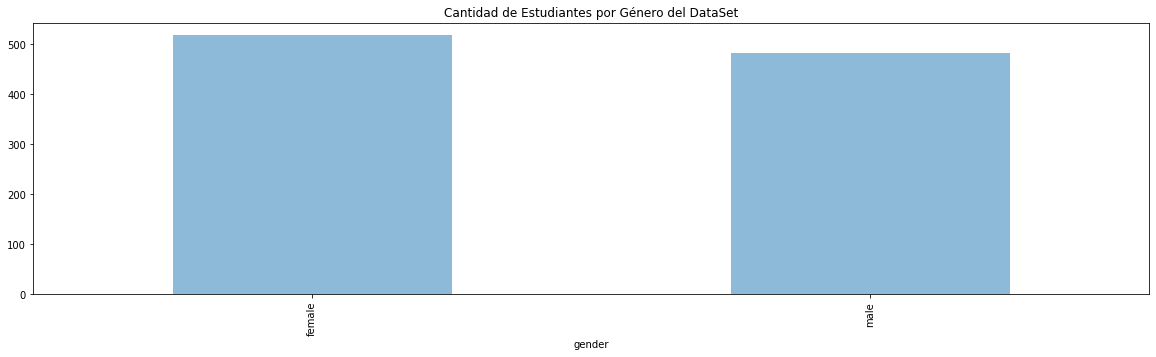

In [19]:
import matplotlib.pyplot as plt

# Creación de un canvas o figura de 30x10 pixeles
fig = plt.figure(figsize=(20,5)) 

# Para ver un plot al costado del otro: se debe pensar en una grilla (celdas)
df.groupby('gender')['math'].count().plot(kind='bar', alpha = 0.5)
plt.title('Cantidad de Estudiantes por Género del DataSet')
#plt.legend({"Femenino", "Masculino"})

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

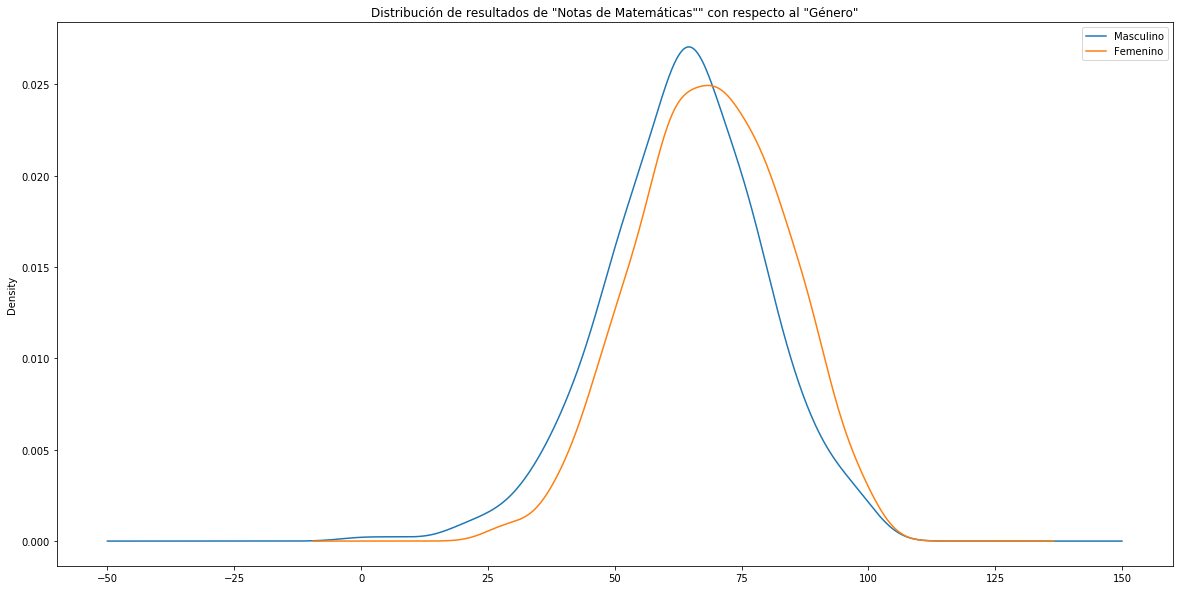

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
for t_gen in ['female', 'male']:
    df.math[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino", "Masculino"})
plt.title('Distribución de resultados de "Notas de Matemáticas"" con respecto al "Género"')
plt.show

Como se puede ver, el promedio de las notas de matemáticas para el género Femenino es del 68.73% y para el género Masculino es el 63.33% (como se aprecia en los valores estadísticos calculados previamente).

<function matplotlib.pyplot.show(*args, **kw)>

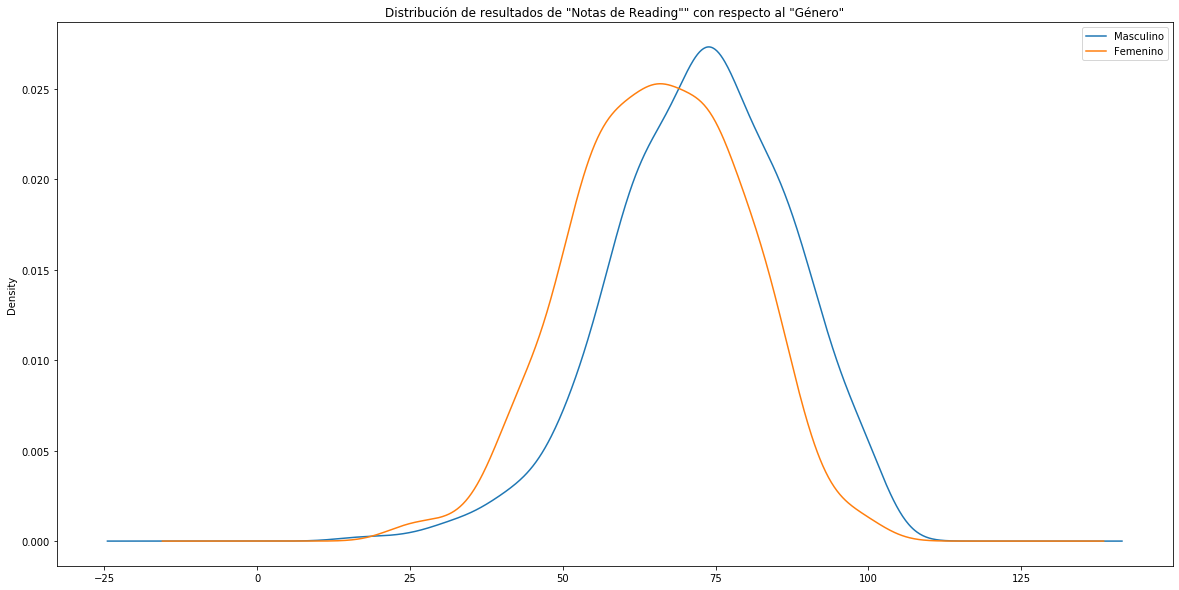

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
for t_gen in ['female', 'male']:
    df.reading[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino", "Masculino"})
plt.title('Distribución de resultados de "Notas de Reading"" con respecto al "Género"')
plt.show

Como se puede ver, el promedio de las notas de Lectura para el género Femenino es del 72.61% y para el género Masculino es el 65.47% (como se aprecia en los valores estadísticos calculados previamente).

<function matplotlib.pyplot.show(*args, **kw)>

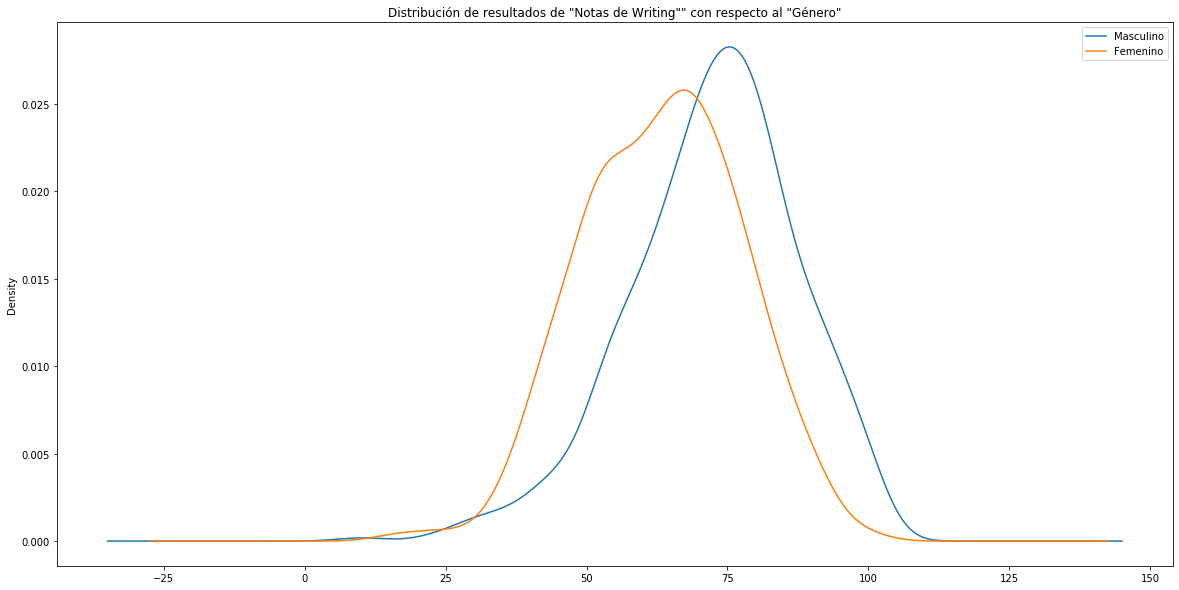

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
for t_gen in ['female', 'male']:
    df.writing[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino", "Masculino"})
plt.title('Distribución de resultados de "Notas de Writing"" con respecto al "Género"')
plt.show

Como se puede ver, el promedio de las notas de Escritura para el género Femenino es del 72.47% y para el género Masculino es el 63.31% (como se aprecia en los valores estadísticos calculados previamente).

### **a2) Valores Faltantes de datos del Dataset**

- Total de datos por columnas en el DATAFRAME:

In [23]:
df.count()

gender     1000
R/E        1000
PLE        1000
lunch      1000
TPC        1000
math       1000
reading    1000
writing    1000
dtype: int64

- Total de datos nulos por columnas en el DATAFRAME:

In [24]:
df.isnull().sum()

gender     0
R/E        0
PLE        0
lunch      0
TPC        0
math       0
reading    0
writing    0
dtype: int64

- Validación de la existencia de datos Nulos en el DataSet

In [25]:
df.isnull().values.any()

False

Resultado de Verificación Datos Faltantes: **DataSet COMPLETO (NO EXISTEN VALORES FALTANTES)**

### **a3) Outliers (Datos fuera de los valores normales)**

NO APLICA para los valores de Notas Obtenidos

### **a4) Datos No - Balanceados del Dataset**

Los datos se encuentran balanceados.

### **a5) Transformación de datos del Dataset**

##### Variables categóricas

Del conjunto de datos se identifican las siguientes variables categoricas

** Género (gender)

** Raza/Etnia (race/ethnicity)

** Nivel de Educación de los padres (parental level of education)

** Almuerzo (lunch)

** Examen de preparación para el curso (test preparation course)

Se procede a convertir los datos categóricos en numéricos

#### Conversión de Atributo 'gender' en variable numérica

**female** = 1

**male** = 0

In [26]:
df['gender'] = df['gender'].replace({'male' : 0, 'female' : 1})

#### Conversión de Atributo **'R/E'** en variable numérica

R/E = race/ethnicity

**group A** = 1

**group B** = 2

**group C** = 3

**group D** = 4

**group E** = 5

In [27]:
df['R/E'] = df['R/E'].replace({'group A' : 1, 'group B' : 2, 'group C' : 3,'group D' : 4, 'group E' : 5})

#### Conversión de Atributo **'PLE'** en variable numérica

PLE = parental level of education


**bachelor's degree**  = 1

**some college**       = 2

**master's degree**    = 3

**associate's degree** = 4

**high school**        = 5

**some high school**   = 6

In [28]:
ple =["bachelor's degree","some college", "master's degree", "associate's degree", "high school", "some high school"]
df['PLE'] = df['PLE'].replace({ple[0] : 1, ple[1] : 2, ple[2] : 3, ple[3] : 4, ple[4] : 5, ple[5] : 6})

#### Conversión de Atributo **'TPC'** en variable numérica

TPC = test preparation course

**none** = 0

**completed** = 1

In [29]:
df['TPC'] = df['TPC'].replace({'none' : 0, 'completed' : 1})

#### Conversión de Atributo **'lunch'** en variable numérica

**standard** = 0

**free/reduced** = 1

In [30]:
df['lunch'] = df['lunch'].replace({'standard' : 0, 'free/reduced' : 1})

- Visualización de los primeros 10 datos del DataSet con **cambio de Datos Categóricos**:

In [31]:
df.head(10)

,gender,R/E,PLE,lunch,TPC,math,reading,writing
0,1,2,1,0,0,72,72,74
1,1,3,2,0,1,69,90,88
2,1,2,3,0,0,90,95,93
3,0,1,4,1,0,47,57,44
4,0,3,2,0,0,76,78,75
5,1,2,4,0,0,71,83,78
6,1,2,2,0,1,88,95,92
7,0,2,2,1,0,40,43,39
8,0,4,5,1,1,64,64,67
9,1,2,5,1,0,38,60,50


Visualización de datos de atributos 'math' y 'reading'

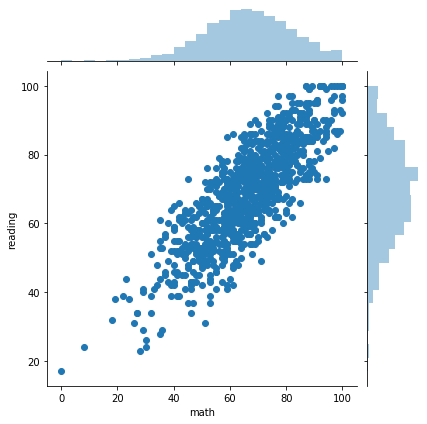

In [32]:
sns.jointplot(data=df,x='math',y='reading')

### **a6) Normalización de datos del Dataset**

#### Instalación de Dependencias (Librerías) - SCIKIT-LEARN
#### Requeridas para NORMALIZAR - ESTANDARIZAR los datos

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

### NORMALIZACIÓN de DATA (SCIKIT-LEARN)

In [34]:
# Copia de DataSet df 
# df_norm será el DataSet con los datos normalizados

df_norm = df.copy()

# train the normalization
scaler = MinMaxScaler()

scaler = scaler.fit(df_norm)

# normalize the dataset
dfsk_norm = scaler.transform(df_norm)

# Tamaño de los datos normalizados (arreglo numpy)
print('Tamaños del DataSet Normalizazado: ')
print(dfsk_norm.shape)
print(' ')

print('Primeros 5 datos de DataSet NO Normalizazado: ')
print(df.head(5))
print(' ')

# Traslado de valores normalizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
#df_norm[:] = dfsk_norm[:]
df_norm['R/E'] = dfsk_norm[:,1]
df_norm['PLE'] = dfsk_norm[:,2]
df_norm['math'] = dfsk_norm[:,5]
df_norm['reading'] = dfsk_norm[:,6]
df_norm['writing'] = dfsk_norm[:,7]

print('Primeros 5 datos de DataSet Normalizado: ')
df_norm.head(5)

Tamaños del DataSet Normalizazado: 
(1000, 8)
 
Primeros 5 datos de DataSet NO Normalizazado: 
   gender  R/E  PLE  lunch  TPC  math  reading  writing
0       1    2    1      0    0    72       72       74
1       1    3    2      0    1    69       90       88
2       1    2    3      0    0    90       95       93
3       0    1    4      1    0    47       57       44
4       0    3    2      0    0    76       78       75
 
Primeros 5 datos de DataSet Normalizado: 


,gender,R/E,PLE,lunch,TPC,math,reading,writing
0,1,0.25,0.0,0,0,0.72,0.662651,0.711111
1,1,0.50,0.2,0,1,0.69,0.879518,0.866667
2,1,0.25,0.4,0,0,0.90,0.939759,0.922222
3,0,0.00,0.6,1,0,0.47,0.481928,0.377778
4,0,0.50,0.2,0,0,0.76,0.734940,0.722222


Para esta Tarea, trataremos de **Clasificar** de acuerdo a los atributos del DataSet, el género de los alumnos (feature = gender).

### Modelos de CLASIFICACIÓN

### 1) Linear Regression

**Escogencia de features y label del modelo a emplear:**

2 features


In [35]:
#features = df[['gender','math']]
#labels = df['PLE']

features = df[['math','reading']]
labels = df['gender']

features1 = df_norm[['math','reading']]
labels1 = df_norm['gender']

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 80% de datos para el training, 20% de datos para testing

In [36]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)
X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.20, random_state = 13)

Verificación de tamaños de los datos de Training y Testing:

In [37]:
print('Tamaño de X_train: ')
print(X_train.shape)
print(' ')
print('Tamaño de X_test: ')
print(X_test.shape)
print(' ')
print('Tamaño de y_train: ')
print(y_train.shape)
print(' ')
print('Tamaño de y_test: ')
print(y_test.shape)


Tamaño de X_train: 
(800, 2)
 
Tamaño de X_test: 
(200, 2)
 
Tamaño de y_train: 
(800,)
 
Tamaño de y_test: 
(200,)


**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [38]:
from sklearn.linear_model import LogisticRegression

**Definición del modelo del clasificador**

In [39]:
classifier = LogisticRegression(random_state = 0)
#classifier = LogisticRegression(random_state = 0, max_iter=1000, solver='lbfgs', multi_class='multinomial')

**Entrenamiento del Clasificador**

In [40]:
classifier.fit(X_train, y_train)
classifier.fit(X_train_norm, y_train_norm)

D:\ProgramData\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de los valores de Test**

In [41]:
y_pred = classifier.predict(X_test)
y_pred_norm = classifier.predict(X_test_norm)

**Resultados obtenidos por el modelo con valores Test:**

In [42]:
score_test =classifier.score(X_test, y_test)
score_test_norm =classifier.score(X_test_norm, y_test_norm)

print('Score Test DataSet NO NORMALIZADO: ')
print(score_test * 100)
print(' ')
print('Score Test DataSet NORMALIZADO: ')
print(score_test_norm * 100)

Score Test DataSet NO NORMALIZADO: 
81.0
 
Score Test DataSet NORMALIZADO: 
79.5


**Con 3 features**

In [43]:
features = df[['math','reading', 'writing']]
labels = df['gender']

features1 = df_norm[['math','reading', 'writing']]
labels1 = df_norm['gender']

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 80% de datos para el training, 20% de datos para testing

In [44]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)
X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.20, random_state = 13)

**Definición del modelo del clasificador**

In [45]:
classifier = LogisticRegression(random_state = 0)
#classifier = LogisticRegression(random_state = 0, max_iter=1000, solver='lbfgs', multi_class='multinomial')

**Entrenamiento del Clasificador**

In [46]:
classifier.fit(X_train, y_train)
classifier.fit(X_train_norm, y_train_norm)

D:\ProgramData\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de los valores de Test**

In [47]:
y_pred = classifier.predict(X_test)
y_pred_norm = classifier.predict(X_test_norm)

**Resultados obtenidos por el modelo con valores Test:**

In [48]:
score_test =classifier.score(X_test, y_test)
score_test_norm =classifier.score(X_test_norm, y_test_norm)

print('Score Test DataSet NO NORMALIZADO: ')
print(score_test * 100)
print(' ')
print('Score Test DataSet NORMALIZADO: ')
print(score_test_norm * 100)

Score Test DataSet NO NORMALIZADO: 
83.5
 
Score Test DataSet NORMALIZADO: 
86.0


### 2) Decission Tree

**Escogencia de features y label del modelo a emplear:**

2 features


In [49]:
features = df[['math','reading']]
labels = df['gender']

#features = df[['gender','math']]
#labels = df['PLE']

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 80% de datos para el training, 20% de datos para testing

In [50]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)
#X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.20, random_state = 13)

Verificación de tamaños de los datos de Training y Testing:

In [51]:
print('Tamaño de X_train: ')
print(X_train.shape)
print(' ')
print('Tamaño de X_test: ')
print(X_test.shape)
print(' ')
print('Tamaño de y_train: ')
print(y_train.shape)
print(' ')
print('Tamaño de y_test: ')
print(y_test.shape)


Tamaño de X_train: 
(800, 2)
 
Tamaño de X_test: 
(200, 2)
 
Tamaño de y_train: 
(800,)
 
Tamaño de y_test: 
(200,)


**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [52]:
from sklearn.tree import DecisionTreeClassifier

**Definición del modelo del clasificador**

Se le da profundidad = 3

In [53]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

**Entrenamiento del Clasificador**

In [54]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predicción de los valores de Test**

In [55]:
y_predict = DecisionTreeModel.predict(X_test)

**Resultados obtenidos por el modelo con valores Test:**

Se importa la metrica

In [56]:
from sklearn.metrics import accuracy_score

Realizamos la precisión de la clasificación del testing

In [57]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.735

Visualización del Árbol:

In [58]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[ple[0],ple[1],ple[2], ple[3], ple[4], ple[5]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell=True)

0

Desplegamos la imagen del árbol con las siguiente instrucción:
    <img src='simple_tree.png' width = 1000px> 

#### 3 Features

In [59]:
features = df[['math','reading','writing']]
labels = df['gender']

In [60]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)

**Definición del modelo del clasificador**

Se le da profundidad = 3

In [61]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)

**Entrenamiento del Clasificador**

In [62]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predicción de los valores de Test**

In [63]:
y_predict = DecisionTreeModel.predict(X_test)

Realizamos la precisión de la clasificación del testing

In [64]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.825

In [65]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[ple[0],ple[1],ple[2], ple[3], ple[4], ple[5]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell=True)

0

Desplegamos la imagen del árbol con las siguiente instrucción:
    <img src='simple_tree.png' width = 1000px> 

### 3) Método KNN

###### Ejecución del modelo con 4 features

Las features elegidas:

Genero = gender
Matematicas = math
Lectura = reading
Escritura = writing   

La etiquete elegida es:

PLE = parental level of education

Una vez escogido las features se procede a realizar el entrenamiento del modelo

In [66]:
featuresa = df[['gender','math','reading','writing']]
labelsa = df['PLE']
X=featuresa
y=labelsa
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Ejecucion del modelo

Se definen la cantidad de vecinos cercanos, que para nuestro caso va a ser de 4

In [67]:
n_neighbors = 4
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.23


###### Predicción

Se hace la predicción con el modelo y procedemos a imprimir los valores que nos devuelve la matriz de confusión y clasificación.

In [68]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 7 12  2  4  6  2]
 [11 20  1  4  8 11]
 [ 5  7  0  3  0  1]
 [ 7 25  2 13  8  4]
 [ 6 13  2 10 11 12]
 [ 8  7  0  6  5  7]]
              precision    recall  f1-score   support

           1       0.16      0.21      0.18        33
           2       0.24      0.36      0.29        55
           3       0.00      0.00      0.00        16
           4       0.33      0.22      0.26        59
           5       0.29      0.20      0.24        54
           6       0.19      0.21      0.20        33

    accuracy                           0.23       250
   macro avg       0.20      0.20      0.20       250
weighted avg       0.24      0.23      0.23       250



###### Resultado

De acuerdo a los resultados obtenidos en la matriz de clasificación nos da una precisión muy baja.

### 4) Método de Ensamble a emplear: Random Forest

**Escogencia de features y label del modelo a emplear:**

2 features


In [69]:
features = df[['math','reading']]
labels = df['gender']

features1 = df_norm[['math','reading']]
labels1 = df_norm['gender']

X= features
y=labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
# Importamos la libreia
from sklearn.ensemble import RandomForestClassifier

In [71]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [72]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [73]:
y_predict = RandomForestModel.predict(X_test)

In [74]:
rf = accuracy_score(y_test,y_predict)
rf

0.848

In [75]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=[ple[0],ple[1],ple[2], ple[3], ple[4], ple[5]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'],shell=True)

0

<img src='complete_tree.png' width = 1000px>

In [76]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [77]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [78]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [79]:
importances.head(9)

,importance
feature,
reading,0.53021
math,0.46979


In [80]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

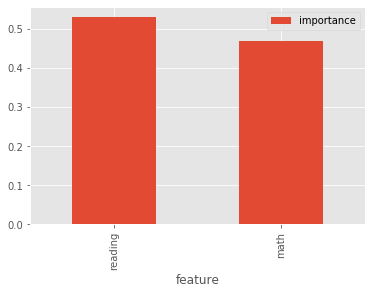

In [81]:
importances.plot.bar()

# **Métodos de Ensamble**.

También se les conocen como **Métodos Combinados**.

En el Aprendizaje de Ensamble, son múltiples clasificadores que combinan sus salidas para obtener una mejor predicción ó precisión de clasificación. Y bajo ciertas condiciones, donde las salidas de los clasificadores son independientes de cada otra y producen errores de una manera independiente, es posible que combinando las salidas de carios clasificadores, se obtenga un clasificador resultante, que sea mejor que cualquiera de los clasificadores que lo constituyen.

El ensamblado es el arte de combinar un conjunto de diversos modelos, para improvisar sobre la estabilidad y el poder predictivo del modelo.
Los modelos pueden ser diferentes entre sí por una variedad de razones:
- Puede haber diferencia en la población de datos.
- Puede haber una técnica de modelado diferente utilizada.
- Puede haber una hipótesis diferente.

**¿Por qué utilizar Métodos de Ensamble?**

* Ofrecen un menor error que el error producido por cada uno de los métodos que lo conforman.
* Produce un menor overfitting que cada uno de los métodos.
* El error de la predicción es menor que cada uno de los errores producido por cada método de ensamble.

Esta es la idea básica de un conjunto: combinar predicciones de varios modelos, promediar los errores idiosincráticos y produce mejores predicciones generales.

## **Métodos de Ensambles de modelos más utilizados en la industria**
a) Agregación Bootstrap.

b) Boosting.

c) Stacking.

e) Random Forest


### **a) Agregación Bootstrap o Bagging**.

Dada una muestra de datos se extraen varias muestras Bootstrap de manera aleatoria (cada variable se puede elegir de la población original, de modo que cada variable es igualmente probable que se seleccione en cada iteración del proceso de arranque). Una vez formadas las muestra Bootstrap, se entrenan los modelos de manera separada, toma en cuenta que las muestras Bootstrap se extraen del conjunto de entranamiento, y los submodelos se entrenan utilizando el conjunto de prueba. La predicción de salida final (resultados), se combina en los proyectos de todos los submodelos.


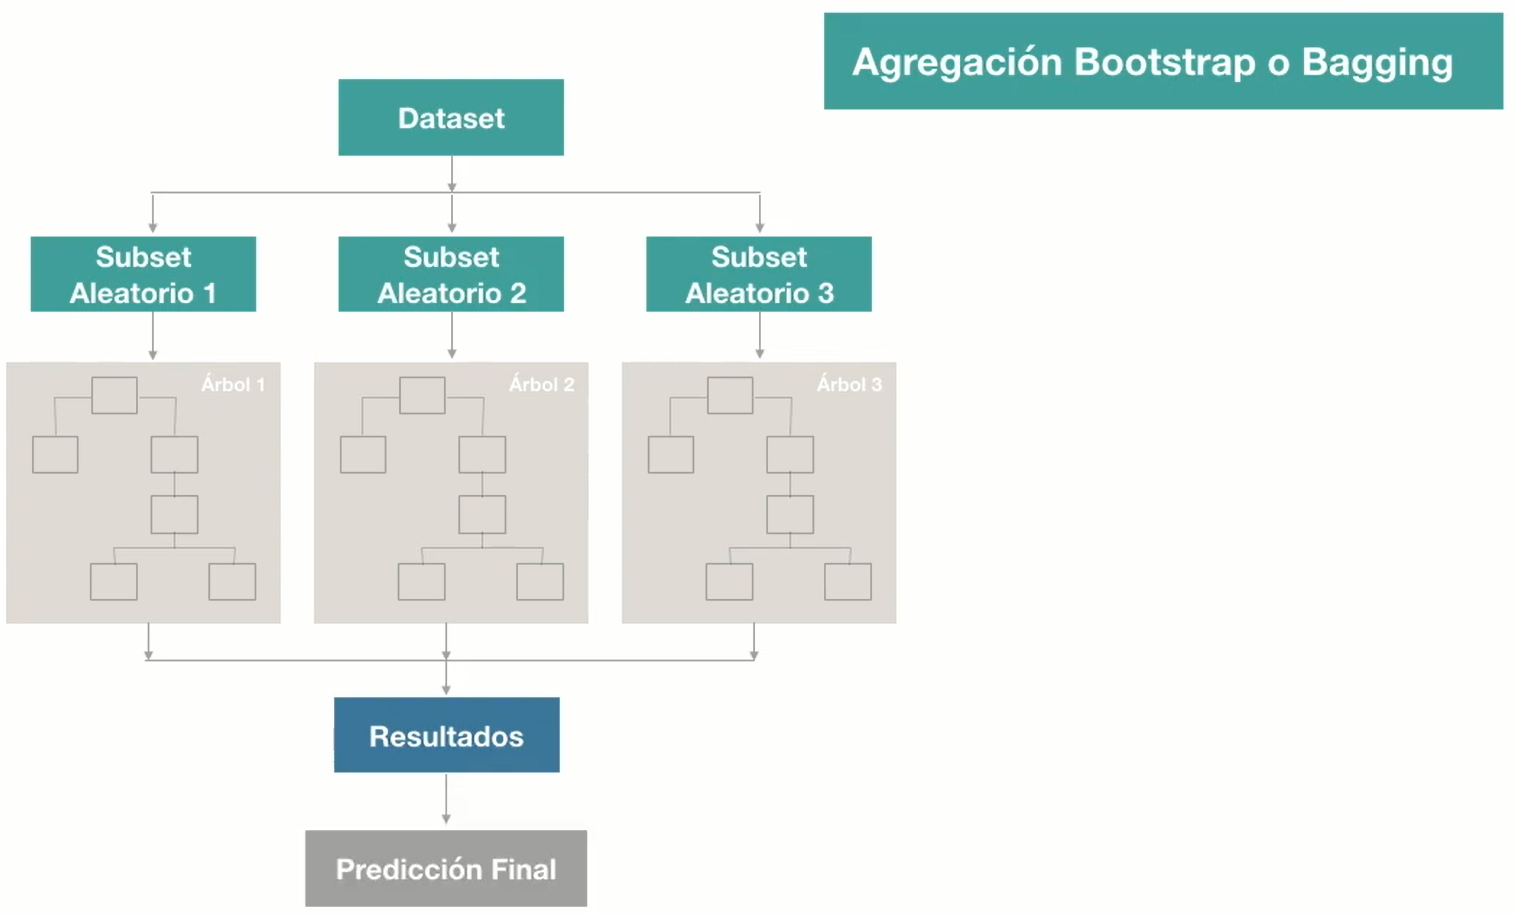

## **b) Boosting**

Es una técnica de aprendizaje secuencial. El modelo funciona entrenando un modelo con todo el conjunto de entrenamiento, y los modelos posteriores se construyen ajustando los valores de error rseidual del modelo inicial. De esta manera Boosting, intenta dar mayor peso a aquellas observaciones que el modelo anterior estimó pobremente.

Una vez creada la secuencia de los modelos, las predicciones hechas por los modelos son ponderadas por sus puntuaciones de precisión y los resultados se combinan para crear una estimación final. Algunos de los modelos que se utilizan en la técnica de refuerzo son: EgiBoos y AdaBoos

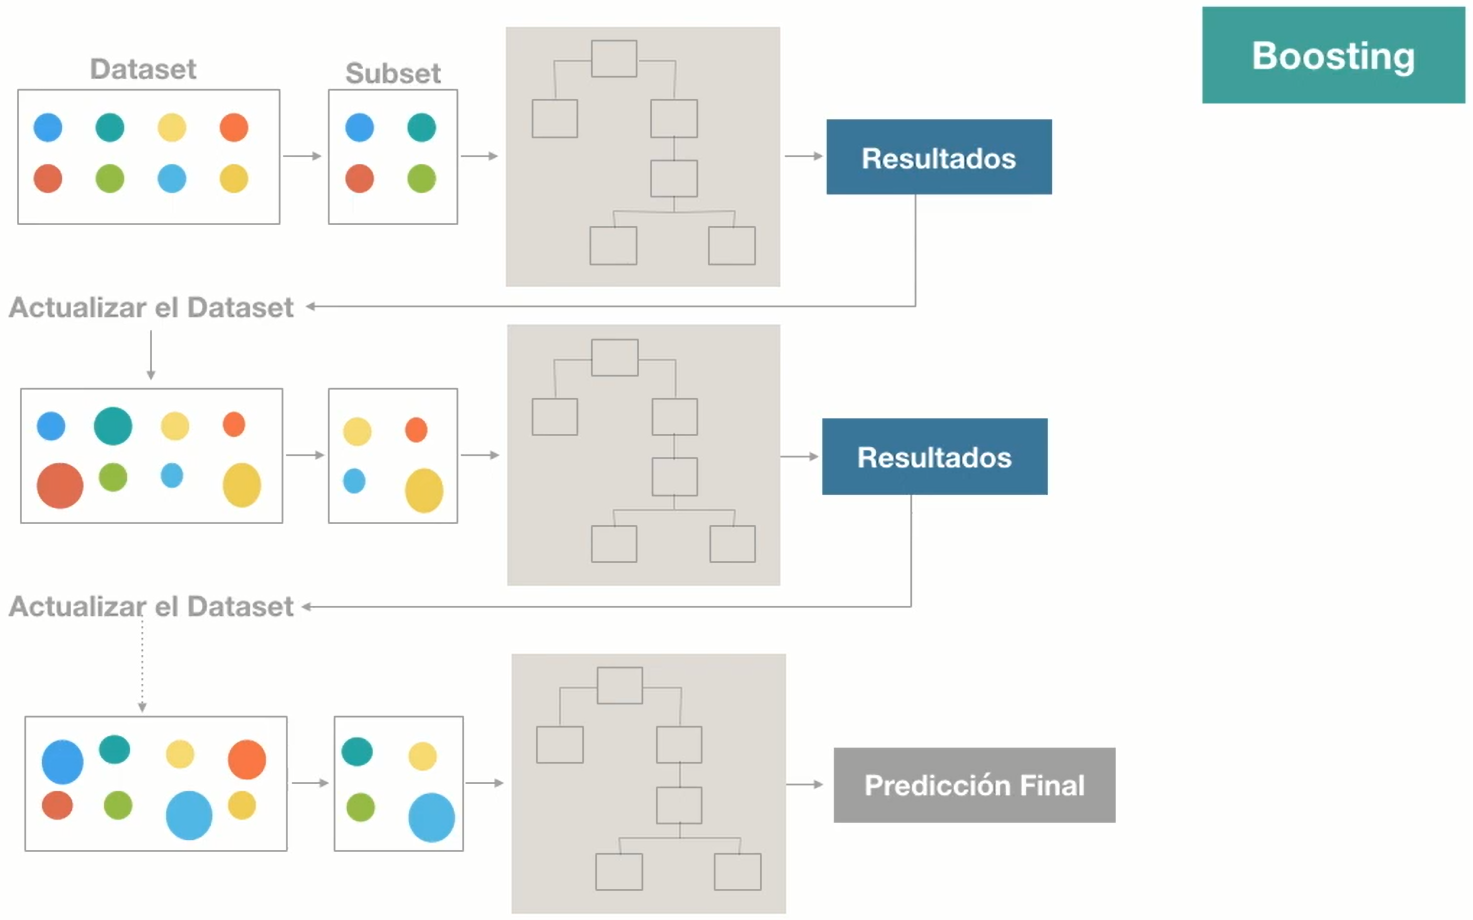

## **c) Stacking**

Stacking construye un conjunto de modelos usando diferentes algoritmos de aprendizaje.

Una forma de combinar los clasificadores es usando voto mayoritario, sin embargo, esto hace sentido cuando los clasificadores se desempeñan en forma parecida.


Para producir una clasificacióon utiliza un meta-algoritmo (meta learner) que aprende de acuerdo a las salidas de los clasificadores base (en lugar de voto mayoritario).


En resumen, se construyen N clasificadores a partir de los datos usando algoritmos diferentes. Las salidas de los clasificadores se usan como atributos (por lo que se tienen tantos atributos para el meta-clasificador como clasificadores) de un nuevo clasificador.

Para estimar el desempeño de cada clasificador se utiliza una conjunto de ejemplos de prueba. Esto se puede hacer con validación cruzada generando una salida por cada conjunto de prueba o con leave-one-out cross validation, generando una salida por cada ejemplo.

Otra posibilidad es utilizar el valor de la probabilidad máas alta de cada clasificador.

Como meta-clasificador normalmente se utiliza algo simple.

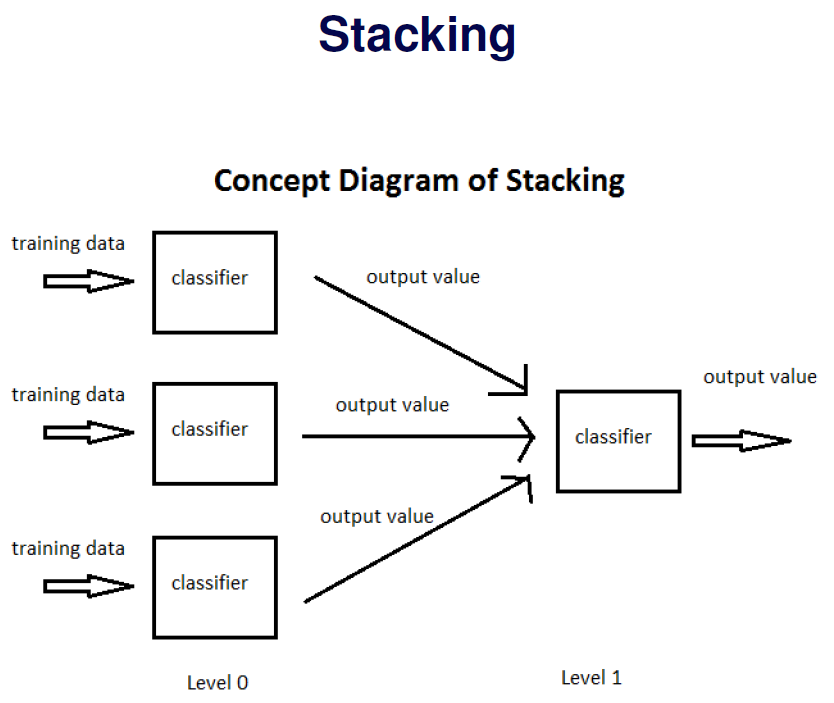

## **e) Random Forest**

Es un algoritmo de ensamble definido por algoritmos **Decision Trees**, donde se fuerza el modelo de ensamble para llegar a diferentes algoritmos de Decision Trees. Esto se fuerza poniendo un poco de aleatoridad en la fase de seleción del atributo, donde diferentes atributos serán seleccionados de una manera aleatoria cuando debe dividirse un nodo. Y estos diferentes métodos actuarán sobre diferentes subconjuntos de los datos.

Por lo que Random Forests es básicamente un método de ensamble de Decision Trees que utiliza diferentes muestras por Bagging, y utiliza el algoritmo de Decision Tree con diferente enfoque aleatorizado para forzarlo a producir diferentes Decision Tree cada vez que el algoritmo es ejecutado.

### **¿Cuál es mejor: Bagging o Boosting ?**

Depende de los datos, la simulación y las circunstancias.

- Ambos disminuyen la varianza de su estimación única (ya que combinan varias estimaciones de diferentes modelos, por lo que el resultado puede ser un modelo con mayor estabilidad).
- Si el problema es que el modelo único obtiene un rendimiento muy bajo, Boosting es la mejor opción.
- Si la dificultad del modelo único se adapta en exceso, entonces la mejor opción es Baggong.


### **Resumen**: 
    
En lugar de hacer un modelo y esperar que este sea el mejor predictor que podamos hacer, los métodos de conjunto tienen en cuenta una gran cantidad de modelos y promedian esos modelos para producir un modelo final